PRIMARY QUESTION: How does latitude effect weather globally?

OBSERVED TRENDS:

~ Average temperature increases towards the equator (where latitude = 0). The data is lopsided due to there being more cities in the northern hemisphere (where latitude > 0). This is easily attributable to greater landmass in the northern hemisphere. Trend is clearly visible in Fig 1.

~ The weather nearest the equator shows stability relative to the zones directly north and south. This may be attributable to lower airflow - Fig 2 shows that few of the entries with great wind speed were near the equator. 

~ The equatorial climate appears to be wetter relative to neighboring subtropical regions. This is demonstrated by high humidity (Fig 3) and high cloudiness (Fig 4) in the immediate vicinity of the equator. These attributes suggest heavier rainfall. Deserts, which show low cloudiness and humidity, seem to fall in subtropical regions that border the equator to the north and south.

In [1]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from config import api_key
import random
import decimal




In [ ]:
# DATA RETRIEVAL
# base url to perform api calls
url = "http://api.openweathermap.org/data/2.5/weather?"

# lists that will make up our summary df
cities = []
clouds = []
dates = []
humidities = []
lats = []
longs = []
max_temps = []
wind_speeds = []
names = []
codes = []


for i in range(0,5000):
    # generate random coordinates
    # use citipy to find the nearest city
    lat = random.randint(-90000, 90000)/1000
    lng = random.randint(-180000, 180000)/1000
    city = citipy.nearest_city(lat,lng)
    city_val = (city.city_name,city.country_code)
    
    # set values of API request
    search_string = city.city_name + ", " + city.country_code
    params = {
        'q':search_string,
        'appid':api_key,
        'units':'imperial'
    }
    weather = requests.get(url, params=params).json()
    
    # first check if the city returns a result in OWM
    if weather['cod'] == 200:
        
        # if city is not already in dataset, append values to lists
        if city_val not in cities:
            print(f"Retrieving results for {search_string}...")
            cities.append(city_val)
            clouds.append(weather['clouds']['all'])
            dates.append(weather['dt'])
            humidities.append(weather['main']['humidity'])
            lats.append(weather['coord']['lat'])
            longs.append(weather['coord']['lon'])    
            max_temps.append(weather['main']['temp_max'])
            wind_speeds.append(weather['wind']['speed'])
            names.append(weather['name'])
            codes.append(weather['sys']['country'])
            
        # stop when we have 500 unique entries
        if len(cities) == 500:
            break    

In [3]:
# synthesize findings into a dataframe
city_summary = pd.DataFrame({
    "City":names,
    "Country Code":codes,
    "Cloudiness":clouds,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":longs,
    "Max Temp (F)":max_temps,
    "Wind Speed":wind_speeds,
    "Date":dates
})

# write to csv
city_summary.to_csv('city_weather_summary.csv')

city_summary.head()

,City,Cloudiness,Country Code,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Alice Springs,0,AU,1520910000,25,-23.70,133.88,84.20,14.99
1,Bergen,75,DE,1520911200,93,52.81,9.96,48.20,8.05
2,Mar del Plata,8,AR,1520913116,58,-46.43,-67.52,54.99,15.01
3,Castro,92,CL,1520913191,79,-42.48,-73.76,52.29,5.95
4,Nome,1,US,1520910900,58,30.04,-94.42,53.60,5.95


FIG 0

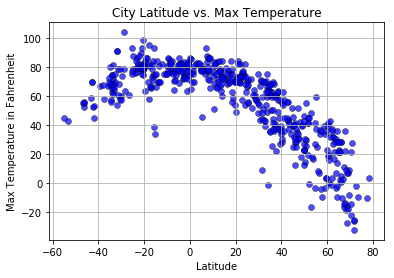

In [4]:
# plot max temp with respect to city latitude
plt.scatter(city_summary['Lat'], city_summary['Max Temp (F)'], marker = 'o', color = 'blue', linewidth = .5, edgecolor= 'black', alpha = .7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")
plt.title("City Latitude vs. Max Temperature")
plt.savefig('lat_vs_maxTemp.png')
plt.grid()
plt.show()


FIG 1

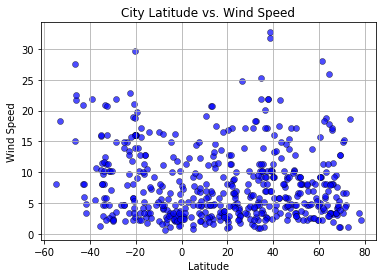

In [5]:
# plot wind speed with respect to latitude
plt.scatter(city_summary['Lat'], city_summary['Wind Speed'], marker = 'o', color = 'blue', linewidth = .5, edgecolor= 'black', alpha = .7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('lat_vs_windSpeed.png')
plt.grid()
plt.show()

FIG 2

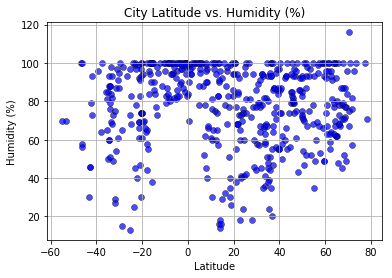

In [6]:
# plot humidity with respect to latitude
plt.scatter(city_summary['Lat'], city_summary['Humidity'], marker = 'o', color = 'blue', linewidth = .5, edgecolor= 'black', alpha = .7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')

plt.show()


FIG 3

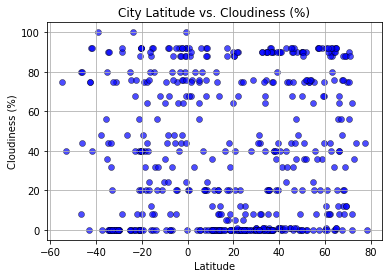

In [7]:
# plot cloudiness with respect to latitude
plt.scatter(city_summary['Lat'], city_summary['Cloudiness'], marker = 'o', color = 'blue', linewidth = .5, edgecolor= 'black', alpha = .7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')

plt.show()

FIG 4

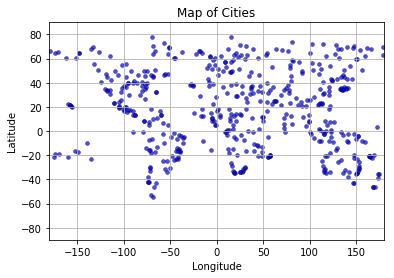

In [13]:
plt.scatter(city_summary['Lng'], city_summary['Lat'],s=15, marker = 'o', color = 'blue', linewidth = .5, edgecolor= 'black', alpha = .7)
plt.xlabel("Longitude")
plt.xlim((-180,180))
plt.ylabel("Latitude")
plt.ylim((-90,90))
plt.title("Map of Cities")
plt.grid()
plt.savefig('worldMap.png')

plt.show()

FIG 5